## Importing Essential Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import random
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

## Spliting Dataset

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Checking Shape of images

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Using Assert Function To Cross Validate Data

In [0]:
assert(x_train.shape[0]==y_train.shape[0]),"Image Lengths Are Not Same"
assert(x_test.shape[0]==y_test.shape[0]),'Image Lengths Are Not Same'
assert(x_train.shape[1:]==(28,28)),'Shapes Are Not Same'
assert(x_test.shape[1:]==(28,28)),"Shapes Are Not Same"

## Plotting The Images

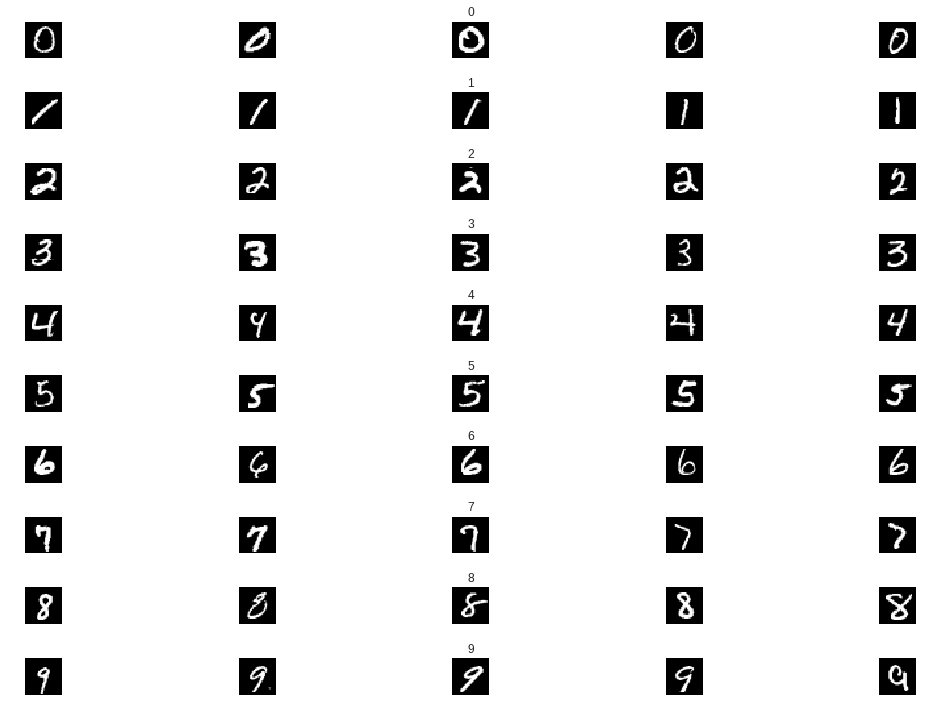

In [0]:
numberOfSamples = []
classes = 10
cols = 5
fig,axs = plt.subplots(nrows=classes,ncols=cols,figsize=(15,10))
fig.tight_layout()
for i in range(cols):
  for j in range(classes):
    x_selected = x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)),:,:],cmap="gray")
    axs[j][i].axis('off')
    if(i==2):
      axs[j][i].set_title(j)
      numberOfSamples.append(len(x_selected))

## Ploting Bar Plot For Number Of Samples

Text(0, 0.5, 'Number Of Samples')

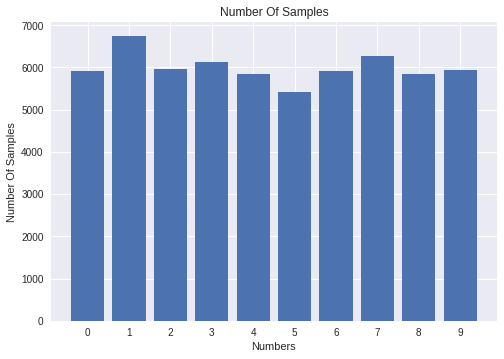

In [0]:
plt.bar(range(0,len(numberOfSamples)),numberOfSamples)
plt.xticks(np.arange(0,len(numberOfSamples)))
plt.title("Number Of Samples")
plt.xlabel("Numbers")
plt.ylabel("Number Of Samples")

## Convert Y Data Into Categorical

In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Convert Every Image Into 0 To 1 Format For Faster Performance

In [0]:
x_train = x_train/255
x_test = x_test/255

## Convert Image Into 28 By 28 By 1

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [0]:
x_train[0].shape

(28, 28, 1)

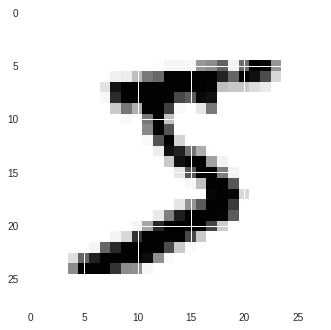

In [0]:
plt.imshow(x_train[0].reshape(28,28))

In [0]:
def lenet():
  model = Sequential()
  model.add(Conv2D(30,(3,3),input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(2,2),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation="softmax"))
  model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model = lenet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 15)        1815      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               270500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
__________

In [0]:
h = model.fit(x=x_train,y=y_train,verbose=1,shuffle=123,validation_split=0.1,batch_size=400,epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.2671 - acc: 0.9147 - val_loss: 0.0548 - val_acc: 0.9837
Epoch 2/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0845 - acc: 0.9737 - val_loss: 0.0511 - val_acc: 0.9838
Epoch 3/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0694 - acc: 0.9787 - val_loss: 0.0425 - val_acc: 0.9887
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0632 - acc: 0.9801 - val_loss: 0.0511 - val_acc: 0.9853
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.0398 - val_acc: 0.9902
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0423 - val_acc: 0.9880
Epoch 7/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0479 - acc: 0.9846 - val_loss: 0.0421 - val_acc:

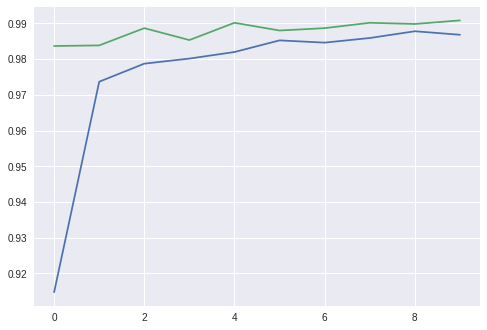

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

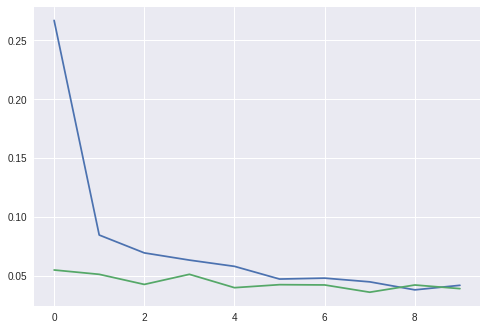

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

## Testing With Real Data

In [0]:
import requests
from PIL import Image
import cv2

In [0]:
url = "https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png"
res = requests.get(url,stream=True)
img = Image.open(res.raw)
img = np.asarray(img)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,28,28,1)

In [0]:
prediction = model.predict_classes(img)

In [142]:
prediction

array([2])